<a href="https://colab.research.google.com/github/Fleapous/Tensorflow/blob/main/GoogleColab/medical_cost/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Fleapous/Tensorflow/main/GoogleColab/medical_cost/insurance.csv?token=GHSAT0AAAAAAB6CASU5Q25Q6JSSS3ZG6FKOY6WYB6Q')

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [11]:
region_dummie = pd.get_dummies(df['region'], drop_first=True)

In [12]:
insurance = df

In [13]:
insurance = insurance.join(region_dummie)

In [15]:
insurance.drop('region', axis=1, inplace=True)

In [16]:
insurance

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,1


In [21]:
sex_dummie = pd.get_dummies(df['sex'], drop_first=True)
smoker_dummie = pd.get_dummies(df['smoker'], drop_first=True)

In [24]:
insurance = insurance.join(sex_dummie)
insurance = insurance.join(smoker_dummie)
insurance.drop(['sex', 'smoker'], axis=1, inplace=True)

In [25]:
insurance

,age,bmi,children,charges,northwest,southeast,southwest,male,yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


In [26]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   northwest  1338 non-null   uint8  
 5   southeast  1338 non-null   uint8  
 6   southwest  1338 non-null   uint8  
 7   male       1338 non-null   uint8  
 8   yes        1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [32]:
X = insurance.drop('charges', axis=1).values
y = insurance['charges'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
scaller = MinMaxScaler()

In [41]:
X_train = scaller.fit_transform(X_train)

In [42]:
X_test = scaller.transform(X_test)

In [45]:
X_train.shape

(896, 8)

In [116]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dropout(.3, seed=101))

model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(.5, seed=101))

model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(.2, seed=101))


model.add(tf.keras.layers.Dense(1))

model.compile(loss='mae',
              optimizer='adam',
              metrics=['mae'])

In [125]:
model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=1)

Epoch 1/150
28/28 [==============================] - 0s 5ms/step - loss: 3754.5505 - mae: 3754.5505 - val_loss: 3280.9917 - val_mae: 3280.9917
Epoch 2/150
28/28 [==============================] - 0s 3ms/step - loss: 3946.9023 - mae: 3946.9023 - val_loss: 3275.2854 - val_mae: 3275.2854
Epoch 3/150
28/28 [==============================] - 0s 4ms/step - loss: 3930.2368 - mae: 3930.2368 - val_loss: 3272.7778 - val_mae: 3272.7778
Epoch 4/150
28/28 [==============================] - 0s 3ms/step - loss: 3812.8069 - mae: 3812.8069 - val_loss: 3274.5159 - val_mae: 3274.5159
Epoch 5/150
28/28 [==============================] - 0s 3ms/step - loss: 3814.7720 - mae: 3814.7720 - val_loss: 3263.6792 - val_mae: 3263.6792
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 3837.1892 - mae: 3837.1892 - val_loss: 3266.0181 - val_mae: 3266.0181
Epoch 7/150
28/28 [==============================] - 0s 4ms/step - loss: 3902.4075 - mae: 3902.4075 - val_loss: 3263.6255 - val_mae: 3263.6255

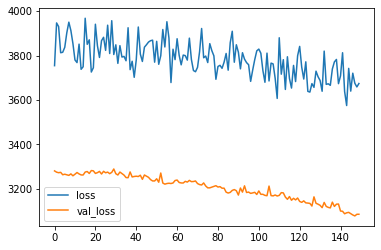

In [126]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [127]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 3085.8477 - mae: 3085.8477


[3085.84765625, 3085.84765625]